In [2]:
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library(stringr)
library(ggrepel)
library(ggh4x)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
df<-read.csv("05_Olink/GZMH_KLRD1_Y1D0_BRI_Olink.csv")
df <- df %>% dplyr::mutate(`Age Group` = case_when(
  cohort.cohortGuid == "BR1" ~ "Young",
  cohort.cohortGuid == "BR2" ~ "Older",
  TRUE ~ NA_character_
))
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))


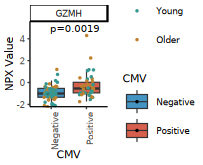

In [11]:
options(repr.plot.width = 43/25.4, repr.plot.height = 35/25.4)
p<-ggplot(df %>% filter(Assay=='GZMH'), aes(x=CMV, y=NPX_bridged,fill=CMV	)) +
    geom_boxplot( outlier.shape = NA,lwd=0.25) +
geom_point(position = position_jitter(width = 0.2), aes( color = `Age Group`), size=0.7,stroke=0) +
theme_classic(base_size=6)+  
stat_compare_means(aes(label = paste0("p=", after_stat(p.format))),
    size=2,
                   vjust=-0.5,
    label.x=1.25)+theme(strip.background = element_rect(linewidth = 0.5))+
    scale_fill_manual(values = c("Positive" = '#d6604d', "Negative" = '#4393c3'))+
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +

    scale_y_continuous(limits = c(NA, NA), 
                       expand = expansion(mult = c(0, 0.2)))+
xlab('CMV')+
ylab('NPX Value')+ theme(axis.text.x = element_text(angle = 90, hjust=1))+
facet_wrap(~Assay,ncol=1 ) 
p
ggsave('FigureJ.pdf',p,width = 43/25.4,height = 35/25.4)